In [ ]:
from model_sp_5_helpers import *
import time
from IPython.display import clear_output

In [2]:
mesh_resolution = 16 # with 20 it takes 5 min.
randomFieldE = calculate_randomFieldE(mesh_resolution=mesh_resolution)

In [11]:
# Time Analysis
mesh_resolutions = [8, 10, 12, 14, 16, 18, 20]
times = []
for mesh_resolution in mesh_resolutions:
    start = time.time()
    omega1 = sample_omega1(randomFieldE)
    omega2 = sample_omega2()
    q = sample_q()
    u_hat_sol_data = solve_model(mesh_resolution, omega1, omega2, q, randomFieldE=randomFieldE)
    end = time.time()
    times.append(end - start)
# Clear console output
clear_output(wait=True)
for mesh_resolution, time_ in zip(mesh_resolutions, times):
    print(f"Mesh Resolution: {mesh_resolution}, Time: {time_:.2f} s")

Mesh Resolution: 8, Time: 6.11 s
Mesh Resolution: 10, Time: 9.78 s
Mesh Resolution: 12, Time: 13.86 s
Mesh Resolution: 14, Time: 19.16 s
Mesh Resolution: 16, Time: 25.98 s
Mesh Resolution: 18, Time: 32.76 s
Mesh Resolution: 20, Time: 39.32 s


Number of nodes: 434


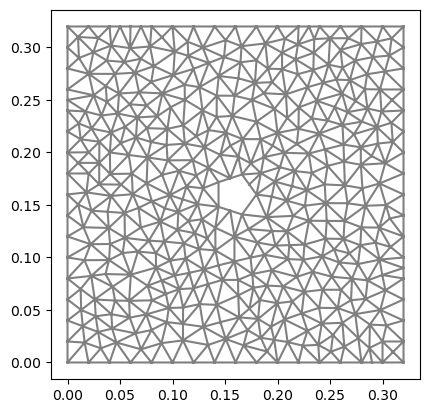

In [12]:
mesh = create_reference_mesh(mesh_resolution = 16)
# Number of nodes
print(f"Number of nodes: {mesh.num_vertices()}")
fe.plot(mesh)
plt.show()

In [3]:
mesh_resolution = 16
run_and_save_mc(mesh_resolution_kl_e=mesh_resolution,
                mesh_resolution=mesh_resolution,
                sample_size=10,
                randomFieldE=randomFieldE)

# Time for randomFieldE = 1m30s
# Time for 10 samples: 3m

Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Solving linear variational problem.
  Building point search tree to accelerate distance 

fine_u_hat_sols.shape: (1930, 1084)
mc_sample_sizes: [4, 8, 16, 32, 64, 128, 256, 512]


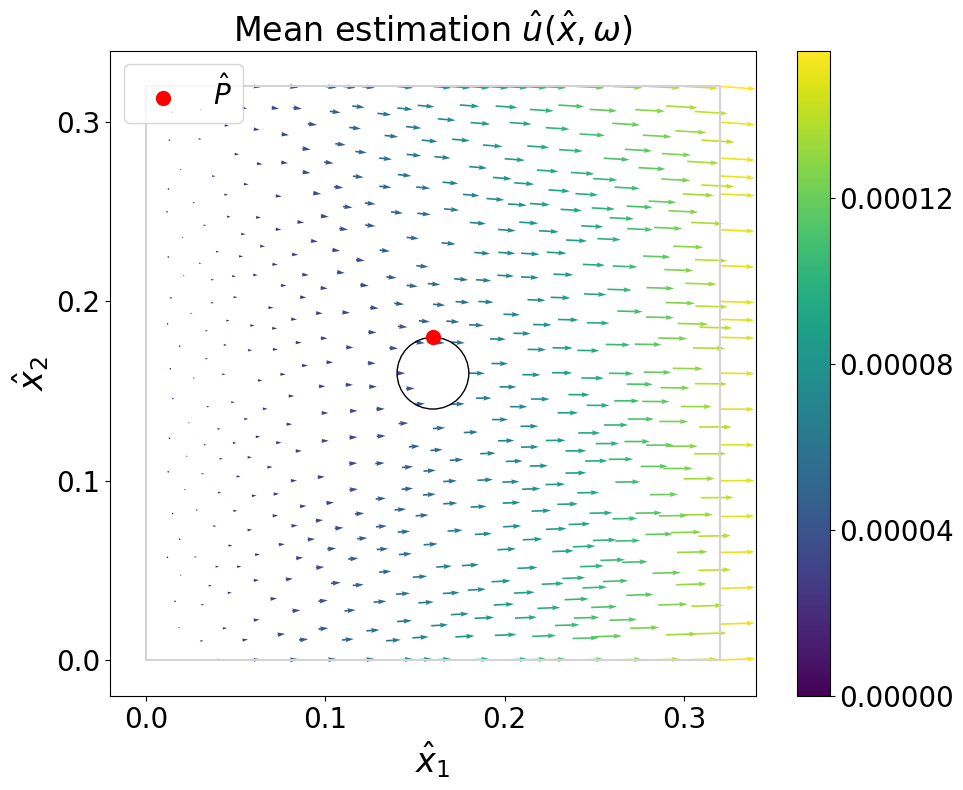

KeyboardInterrupt: 

In [1]:
# Test MC Analysis u hat (with 2950 samples it takes 16 min.)
from model_sp_5_helpers import mc_analysis_u_hat
import fenics as fe
mc_analysis_u_hat(mesh_resolution_kl_e=18,
            mesh_resolution=18)

fine_sigma_hat_proj.shape: (1730, 2168)
mc_sample_sizes: [4, 8, 16, 32, 64, 128, 256, 512]
Object cannot be plotted directly, projecting to piecewise linears.


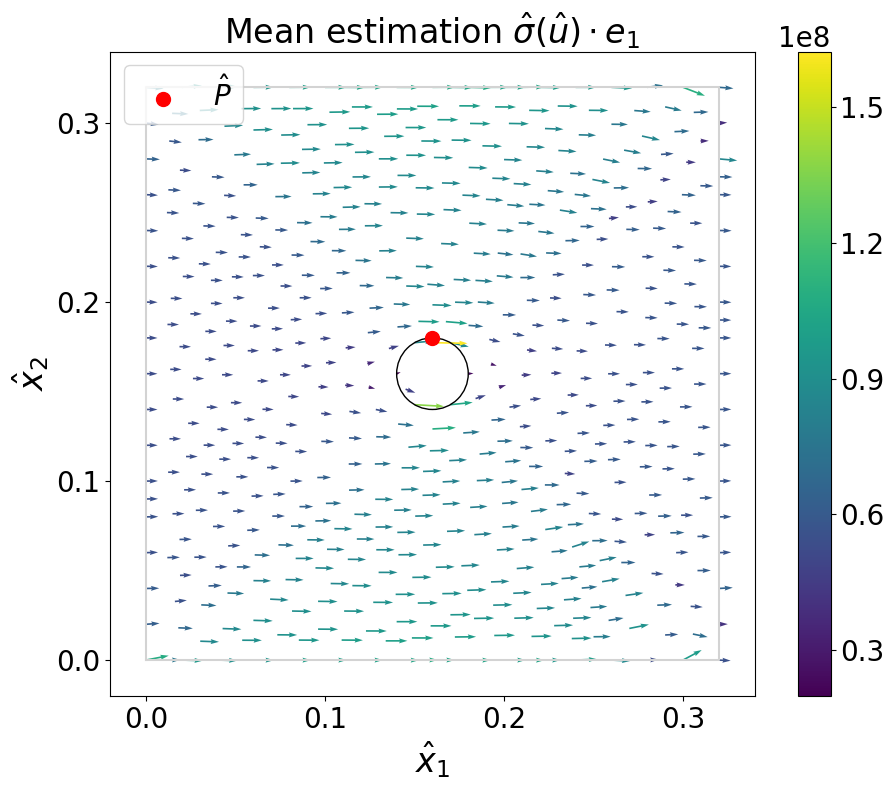

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1075: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=20)


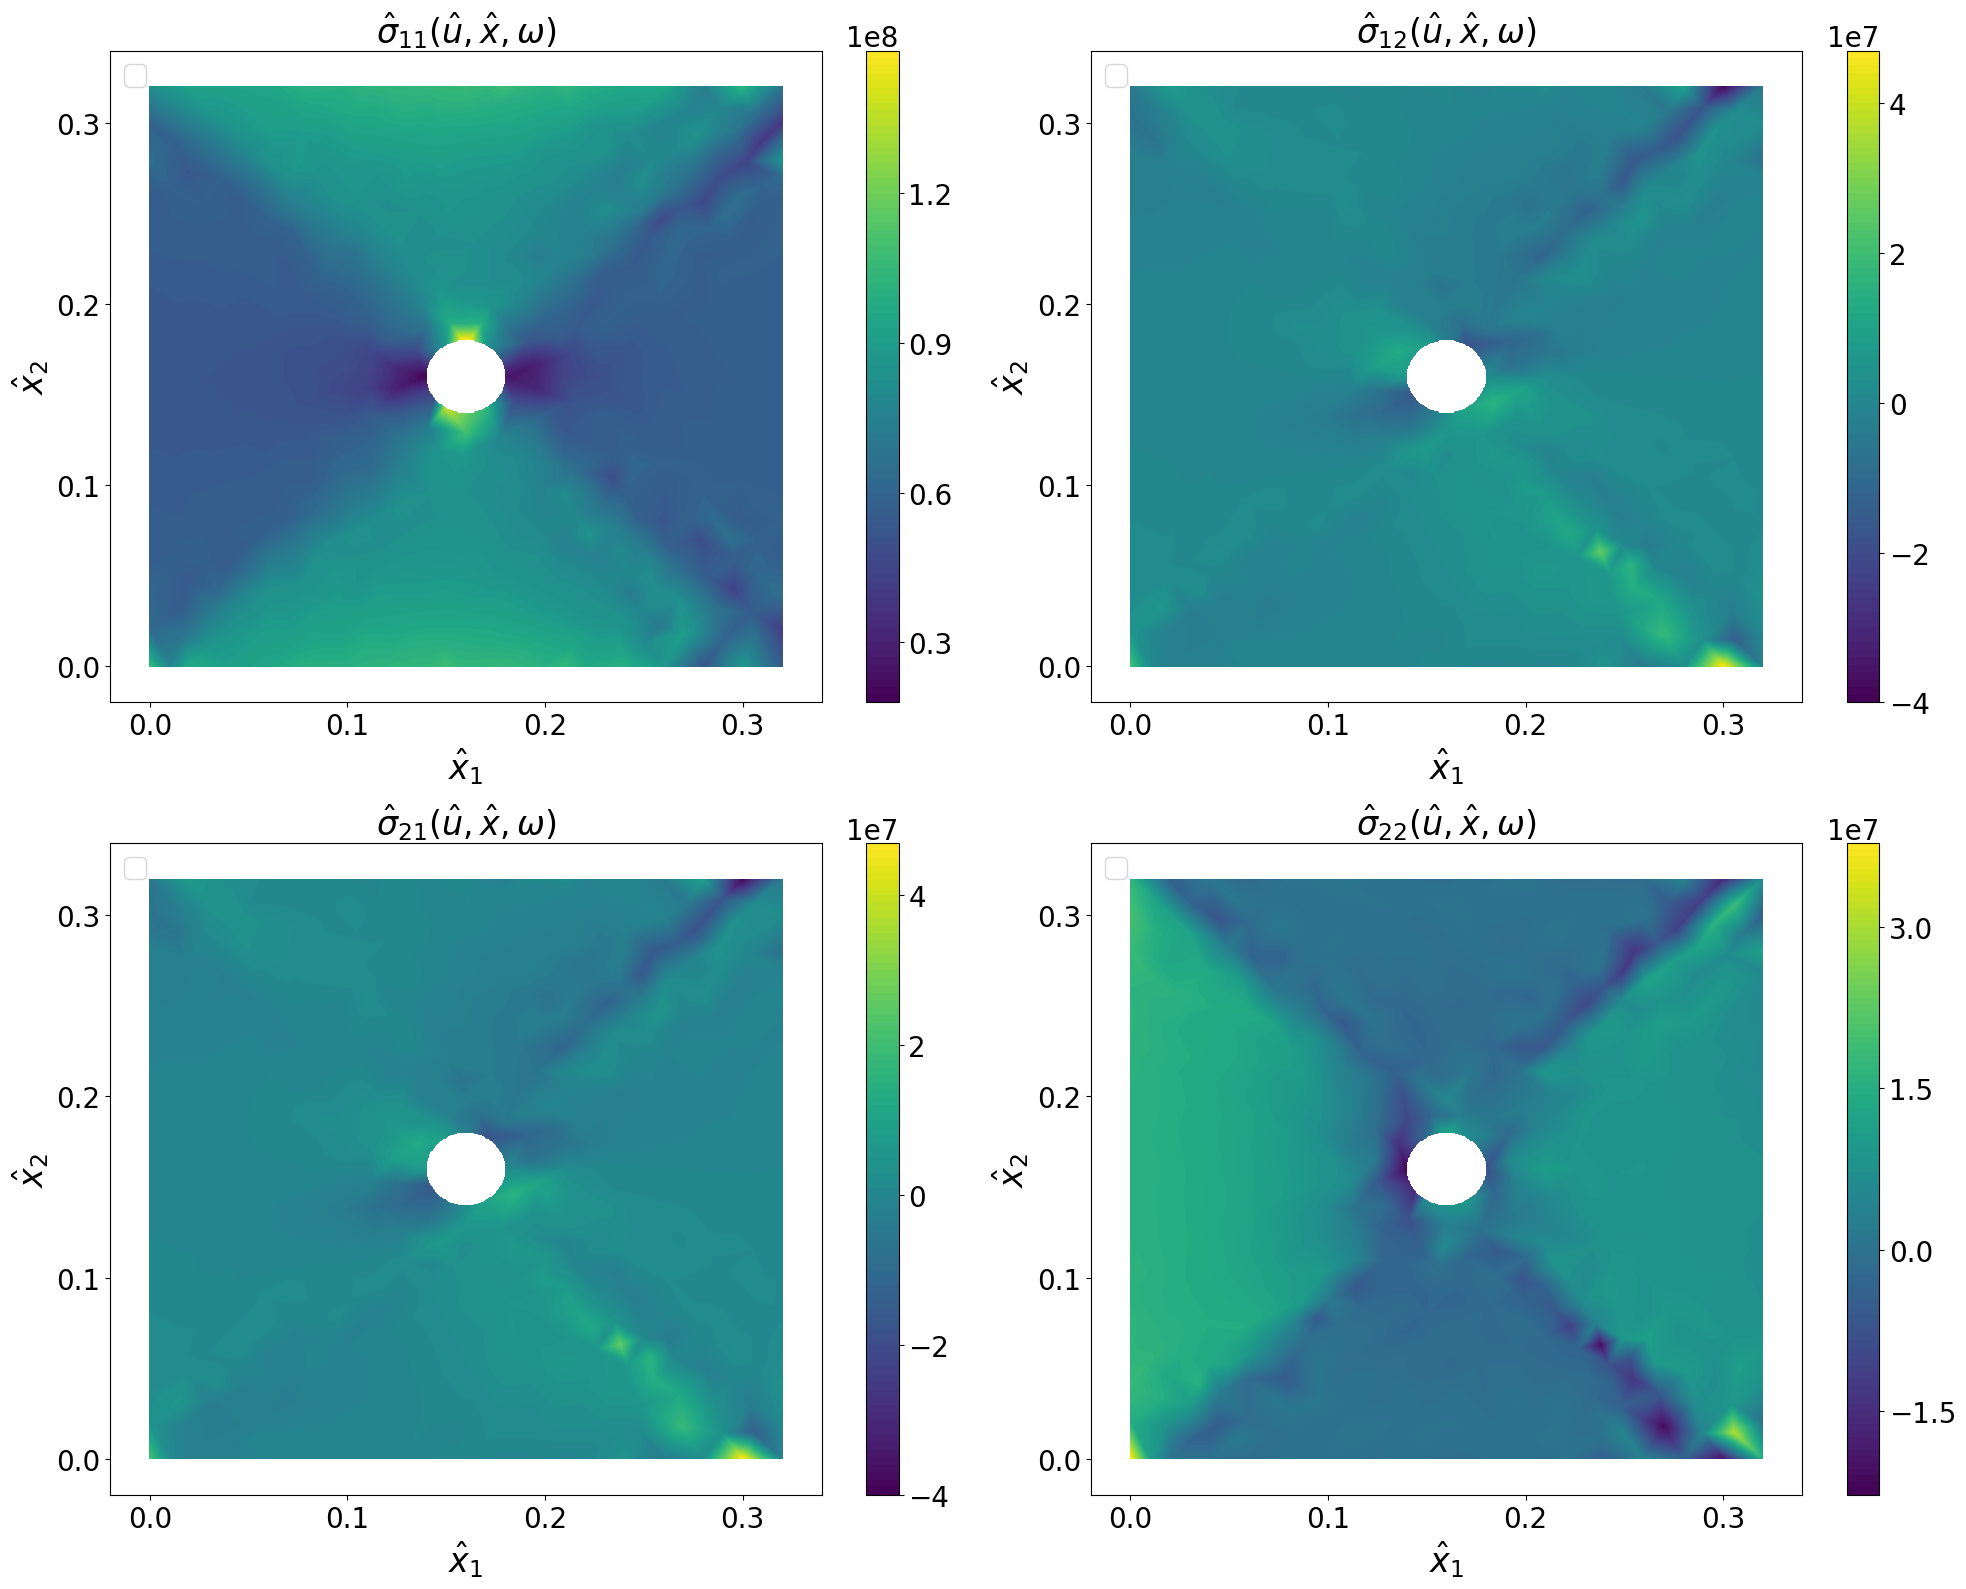

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1116: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(mc_sample_sizes, sparse_sigma_hat_proj_P_hat_means, 'bo', marker='x', linestyle='None', label='Means', markersize=10)


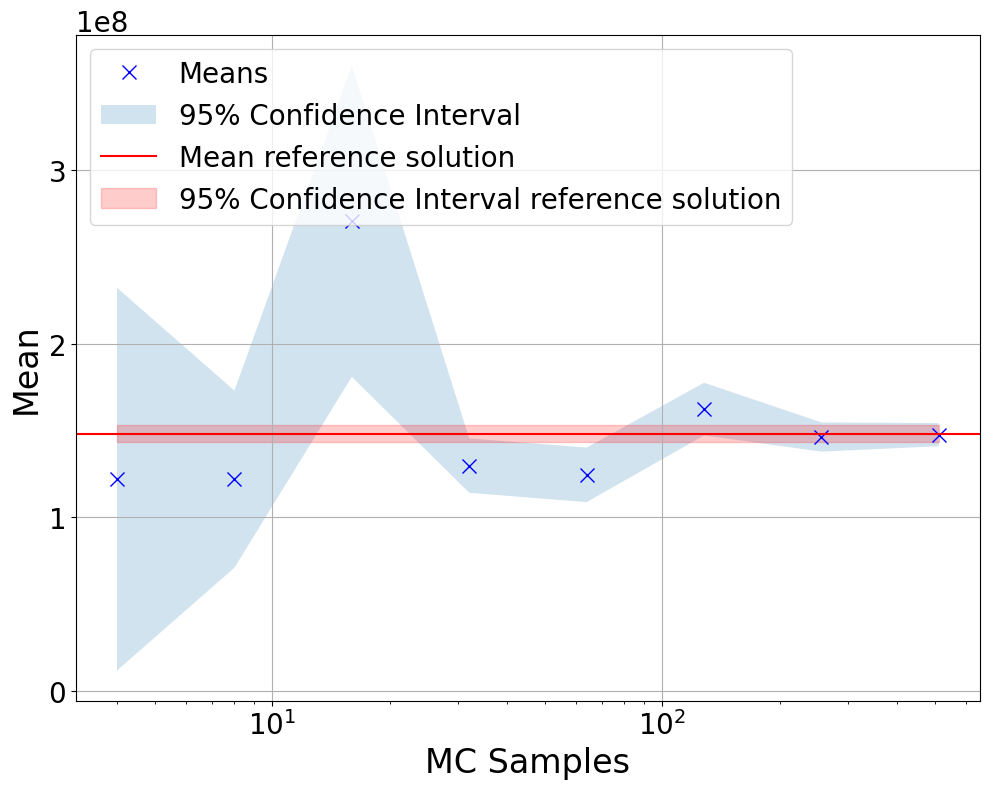

In [1]:
# Test MC Analysis sigma hat
from model_sp_5_helpers import mc_analysis_sigma_hat
import fenics as fe
mc_analysis_sigma_hat(mesh_resolution_kl_e=18,
            mesh_resolution=18,
            P_hat=fe.Point(0.16, 0.18))

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1782: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


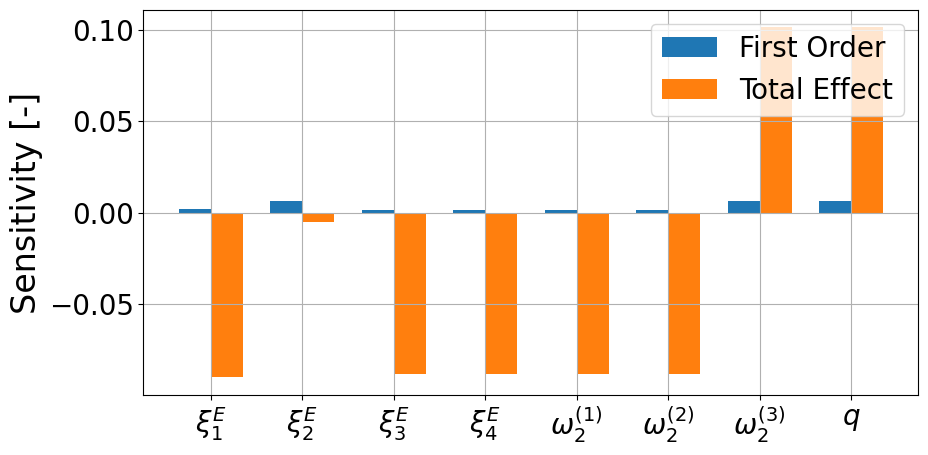

Sample size: 7230


In [4]:
# Test Sobol Index Analysis Sigma Hat
from model_sp_5_helpers import sp_5_sobol_calc_indices_sigma_hat, sp_5_plot_sobols
S_single, S_total, mc_sample_size = sp_5_sobol_calc_indices_sigma_hat(fem_res=12, kl_res_e=12, size_of_xi_e=4)
sp_5_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)


/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1782: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


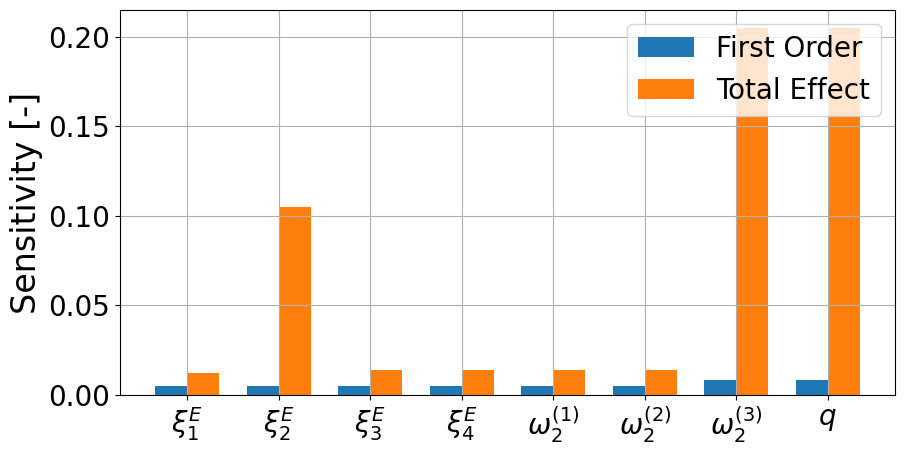

Sample size: 7230


In [5]:
# Test Sobol Index Analysis Sigma Hat
from model_sp_5_helpers import sp_5_sobol_calc_indices_u_hat, sp_5_plot_sobols
S_single, S_total, mc_sample_size = sp_5_sobol_calc_indices_u_hat(fem_res=12, kl_res_e=12, size_of_xi_e=4)
sp_5_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)


In [1]:
from model_sp_5_helpers import calculate_randomFieldE, sample_omega1, sample_omega2, sample_q, solve_model_with_plots_new

randomFieldE = calculate_randomFieldE(mesh_resolution=6)
solve_model_with_plots_new(6, sample_omega1(randomFieldE), sample_omega2(), sample_q(), randomFieldE=randomFieldE)

Calling FFC just-in-time (JIT) compiler, this may take some time.


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to define linear variational problem a(u, v) == L(v) for all v.
*** Reason:  Expecting the left-hand side to be a bilinear form (not rank 0).
*** Where:   This error was encountered inside LinearVariationalProblem.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------
